In [86]:
import tensorflow as tf
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
df = pd.read_csv('insurance.csv')
df

,Age,Insurance
0,57,1
1,62,1
2,36,0
3,7,0
4,57,1
...,...,...
93,5,0
94,37,0
95,7,0
96,49,0


In [88]:
colors = sns.color_palette()
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

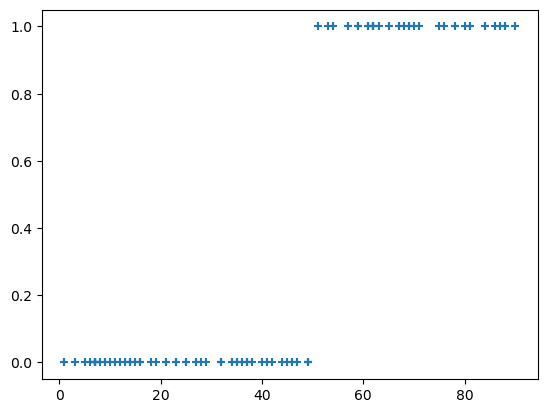

In [89]:
plt.scatter(df.Age,df.Insurance,color=colors[0],marker = '+')

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train, x_test, y_train, y_test = train_test_split(df[['Age']], df.Insurance)

In [92]:
x_train

,Age
76,80
93,5
3,7
13,37
4,57
...,...
28,38
5,23
37,63
87,32


In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
model = LogisticRegression()

In [95]:
model.fit(x_train,y_train)

LogisticRegression()

In [96]:
y_pred = model.predict(x_test)

In [97]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,mean_squared_error

In [98]:
model.score(x_test,y_pred)

1.0

In [99]:
accuracy_score(y_test,y_pred)

1.0

In [100]:
cm = confusion_matrix(y_test,y_pred,annot=True)
sns.heatmap(cm)
plt.legend
plt.xlabel("y_pred")
plt.ylabel("y_true")


TypeError: confusion_matrix() got an unexpected keyword argument 'annot'

In [ ]:
model.coef_[0][0]

In [ ]:
model.intercept_

In [ ]:

import math

In [ ]:
# sigmoid fn
def sigmoid(x):
    return 1/(1+math.exp(-x))


# prediction fn
def prediction(x):
    a = 1.0844123867097095
    b = -55.89990987
    c = a*x + b
    return sigmoid(c)
    

In [ ]:
if prediction(55) > 0.5:
    print(1)
else:
    print(0)

# Handwritten digits classification using neural network

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [ ]:
from tensorflow import keras

In [105]:
(x_train, y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train[0].shape

In [ ]:
plt.matshow(x_train[0])

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0]

In [ ]:
x_test.shape

In [ ]:
x_train_flattened = x_train.reshape(60000,784)
x_test_flattened = x_test.reshape(10000,784)

In [108]:
model = keras.Sequential([keras.layers.Dense(10,activation='sigmoid',input_shape=(784,))])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 525us/step - loss: 0.4705 - accuracy: 0.8768
Epoch 2/5
1875/1875 [==============================] - 1s 513us/step - loss: 0.3037 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 1s 515us/step - loss: 0.2830 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 1s 515us/step - loss: 0.2731 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 1s 515us/step - loss: 0.2663 - accuracy: 0.9259


In [106]:
y_train.shape

(60000,)

In [109]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 468us/step - loss: 0.2683 - accuracy: 0.9255


[0.26828551292419434, 0.9254999756813049]

In [110]:
y_pred = model.predict(x_test_flattened)

313/313 [==============================] - 0s 404us/step


In [111]:
y_pred[0]

array([1.7754268e-02, 3.7809812e-07, 5.0796241e-02, 9.6669436e-01,
       2.1612172e-03, 7.6519638e-02, 1.3281415e-06, 9.9974358e-01,
       6.4771704e-02, 5.8948177e-01], dtype=float32)

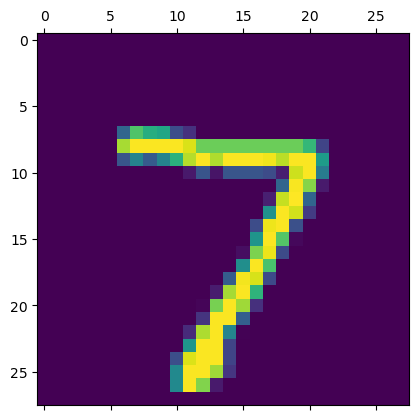

In [112]:
plt.matshow(x_test[0])

In [113]:
np.argmax(y_pred[0])

7

In [118]:
y_pred_digits = [np.argmax(i) for i in y_pred]
len(y_pred_digits)

10000

In [119]:
cm =confusion_matrix(y_test,y_pred_digits)

In [120]:
cm

array([[ 961,    0,    1,    2,    0,    5,    7,    3,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   7,    9,  917,   19,   12,    2,   13,   11,   38,    4],
       [   3,    0,   15,  937,    1,   19,    3,    8,   13,   11],
       [   1,    1,    2,    1,  916,    0,   12,    4,    9,   36],
       [  11,    2,    2,   41,   11,  760,   20,    9,   30,    6],
       [  10,    3,    6,    1,    7,    8,  920,    2,    1,    0],
       [   1,    6,   21,    9,    7,    0,    0,  947,    1,   36],
       [   7,   10,    7,   32,    9,   22,    9,   12,  859,    7],
       [  11,    7,    1,   14,   29,    4,    0,   17,    4,  922]])

Text(158.22222222222223, 0.5, 'Truth')

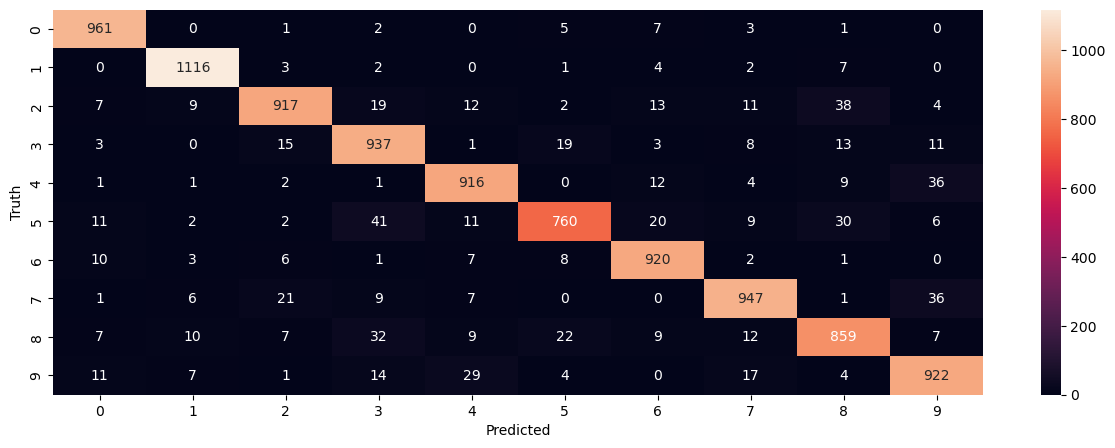

In [122]:
plt.figure(figsize=(15,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [123]:
classification_report(y_test,y_pred_digits)

'              precision    recall  f1-score   support\n\n           0       0.95      0.98      0.96       980\n           1       0.97      0.98      0.98      1135\n           2       0.94      0.89      0.91      1032\n           3       0.89      0.93      0.91      1010\n           4       0.92      0.93      0.93       982\n           5       0.93      0.85      0.89       892\n           6       0.93      0.96      0.95       958\n           7       0.93      0.92      0.93      1028\n           8       0.89      0.88      0.89       974\n           9       0.90      0.91      0.91      1009\n\n    accuracy                           0.93     10000\n   macro avg       0.93      0.92      0.92     10000\nweighted avg       0.93      0.93      0.93     10000\n'

# Using hidden layer

In [126]:
model = keras.Sequential([keras.layers.Dense(100,activation='relu',input_shape=(784,)),
                         keras.layers.Dense(10,activation='sigmoid',)])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [127]:
model.fit(x_train_flattened,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 2s 813us/step - loss: 0.2777 - accuracy: 0.9208
Epoch 2/5
1875/1875 [==============================] - 1s 763us/step - loss: 0.1253 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 1s 759us/step - loss: 0.0884 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 1s 766us/step - loss: 0.0676 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 1s 765us/step - loss: 0.0547 - accuracy: 0.9830


313/313 [==============================] - 0s 503us/step


Text(158.22222222222223, 0.5, 'Truth')

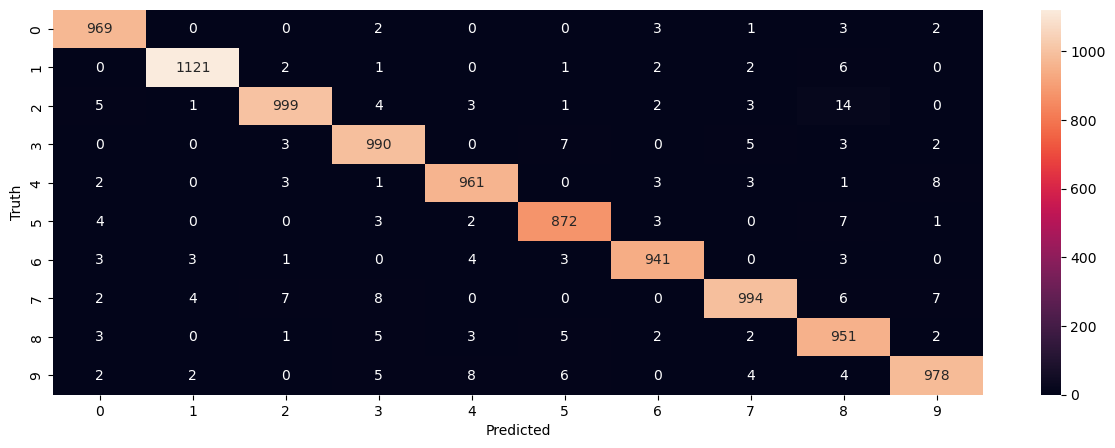

In [129]:
y_pred = model.predict(x_test_flattened)
y_pred_digits = [np.argmax(i) for i in y_pred]
len(y_pred_digits)
cm =confusion_matrix(y_test,y_pred_digits)
plt.figure(figsize=(15,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')